In [63]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns



In [64]:
titanic = pd.read_csv('titanic_data.csv')
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
3,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
4,24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5000,A6,S


The passengers embarked from three different ports in three separate regions: Southampton in England, Queenstown in Ireland (that was part of UK) and Cherbourg in France. Can we infere wealth differences between these regions based on passenger data from this dataset?

Using the fare for this question is complicated, because some passengers paid for their companions (family members, maids, nurses...), and prices varied greatly even for the same class: https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic#Passengers

Thus, using the passenger class is a more straightforward way.

For each passenger, we need the class and the port they embarked from. Unfortunately, we do not always know the port, so we will drop these rows:

In [66]:
class_port = titanic[['PassengerId', 'Pclass', 'Embarked']]
print class_port.isnull().any()
print
class_port = class_port.dropna()
print class_port.isnull().any()

PassengerId    False
Pclass         False
Embarked        True
dtype: bool

PassengerId    False
Pclass         False
Embarked       False
dtype: bool


We need the number of passengers for each port of embarkment and class:

In [67]:
passengers_by_port_class = class_port.groupby(['Embarked', 'Pclass'], as_index=False).count()
print passengers_by_port_class

  Embarked  Pclass  PassengerId
0        C       1           85
1        C       2           17
2        C       3           66
3        Q       1            2
4        Q       2            3
5        Q       3           72
6        S       1          127
7        S       2          164
8        S       3          353


and the total number of passengers for each port:

In [68]:
passengers_by_port_class['Total'] = passengers_by_port_class.groupby('Embarked')['PassengerId'].transform(sum)
print passengers_by_port_class

  Embarked  Pclass  PassengerId  Total
0        C       1           85    168
1        C       2           17    168
2        C       3           66    168
3        Q       1            2     77
4        Q       2            3     77
5        Q       3           72     77
6        S       1          127    644
7        S       2          164    644
8        S       3          353    644


Now we can calculate the percentage of each class per port:

In [69]:
passengers_by_port_class['Percent'] = passengers_by_port_class.PassengerId * 100 / passengers_by_port_class.Total
print passengers_by_port_class

  Embarked  Pclass  PassengerId  Total    Percent
0        C       1           85    168  50.595238
1        C       2           17    168  10.119048
2        C       3           66    168  39.285714
3        Q       1            2     77   2.597403
4        Q       2            3     77   3.896104
5        Q       3           72     77  93.506494
6        S       1          127    644  19.720497
7        S       2          164    644  25.465839
8        S       3          353    644  54.813665


We can use a stacked bars chart to visualize the results:

Populating the interactive namespace from numpy and matplotlib


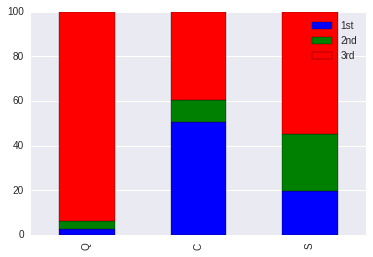

In [70]:
%pylab inline

c_percents = passengers_by_port_class.loc[passengers_by_port_class['Embarked'] == 'C']['Percent']
q_percents = passengers_by_port_class.loc[passengers_by_port_class['Embarked'] == 'Q']['Percent']
s_percents = passengers_by_port_class.loc[passengers_by_port_class['Embarked'] == 'S']['Percent']

class_port_percents = pd.DataFrame.from_dict({'C':c_percents.values, 'Q':q_percents.values, 'S':s_percents.values}, orient='index')
class_port_percents.columns = ['1st', '2nd', '3rd']
class_port_percents.plot(kind='bar', stacked=True)

The graph shows that more than 90% of the passengers that embarked from Queenstown in Ireland where third class passengers, in contrast with the other ports, where third class made up for 40-55% of the total number of passengers.
The Maddison Project Database (http://www.ggdc.net/maddison/maddison-project/data.htm) shows that Ireland had an estimated GDP per capita of 2.736 (in 1990 International Geary-Khamis Dollars) by 1913 (no data for 1912), while the UK had a GDP of 4.762 and France's was 3.514 by 1912.
Our passenger data coincides with the Maddison Project in the case of Ireland: it was a poor country compared to Europe's average by the year the Titanic sank. However, our data cannot explain why 1st class percentage in Cherbourg doubles Southampton's, being the UK a richer country than France during that time. Maybe the Cherbourg region was wealthier than the average of France, or Southampton was specially poor, but we do not have the data to check this.
Of course, there are other problems. For instance, we do not know if Titanic passengers make a representative sample of the demography of these regions.

How does sex and age affect survivability? How does these factors work together?

In [71]:
sex_age_surv = titanic[['PassengerId', 'Sex', 'Age', 'Survived']]
sex_age_surv_count = sex_age_surv.count()
print sex_age_surv_count

PassengerId    891
Sex            891
Age            714
Survived       891
dtype: int64


We do not have the age for every passenger, so we will have to take this into account when analysing the data. The rest of the data is complete.

First, we will analyze the effect of sex alone on survivability. We can use a bar chart with the percentage of survivors for the total sample and for every sex, like we did in the last question for the class and port.

In [72]:
sex_surv = sex_age_surv[['PassengerId', 'Sex', 'Survived']]
sex_surv_count = sex_surv[['PassengerId', 'Sex']].groupby('Sex').count()
print sex_surv_count

        PassengerId
Sex                
female          314
male            577


Because the 'Survived' column can only contain 1 for 'yes' and 0 for 'no', we can count all the survivors of each sex by grouping by sex and adding the 'Survived' column.

In [73]:
sex_surv_count['Survived'] = sex_surv[['Survived', 'Sex']].groupby('Sex').sum()
print sex_surv_count

        PassengerId  Survived
Sex                          
female          314       233
male            577       109


In [74]:
totals = pd.Series(sex_surv_count.sum(), name='total')
sex_surv_count = sex_surv_count.append(totals)
sex_surv_count['SurvPerc'] = sex_surv_count.Survived * 100 / sex_surv_count.PassengerId
print sex_surv_count

        PassengerId  Survived   SurvPerc
Sex                                     
female          314       233  74.203822
male            577       109  18.890815
total           891       342  38.383838


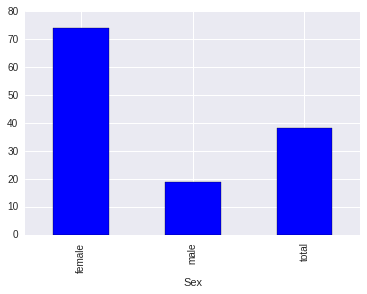

In [75]:
sex_surv_count['SurvPerc'].plot(kind='bar')

It looks like the survival rate is very biased towards the female sex: nearly three quarters of women survived, compared to a bit less than one fifth of the men aboard the Titanic. The total survival rate is low because were more men than women aboard.

Now we will analyze age. We choose to drop the passengers for whom we do not know the age. We also have to group the passengers in age bins in order to have meaningful statistics:

In [76]:
age_surv = sex_age_surv[['PassengerId', 'Age', 'Survived']].dropna()
print age_surv.Age.max()
age_surv['bin'] = pd.cut(age_surv['Age'],np.arange(0,90,10), right=False)
print age_surv.head()

80.0
   PassengerId  Age  Survived       bin
0            2   38         1  [30, 40)
1            4   35         1  [30, 40)
2            7   54         0  [50, 60)
3           12   58         1  [50, 60)
4           24   28         1  [20, 30)


We can know calculate the number of passengers in every age bin and how many of them survived:

In [77]:
age_surv_count = age_surv[['PassengerId', 'bin']].groupby('bin').count()
age_surv_count['Survived'] = age_surv[['Survived', 'bin']].groupby('bin').sum()
age_surv_count['SurvPerc'] = age_surv_count.Survived * 100 / age_surv_count.PassengerId
print age_surv_count

          PassengerId  Survived   SurvPerc
bin                                       
[0, 10)            62        38  61.290323
[10, 20)          102        41  40.196078
[20, 30)          220        77  35.000000
[30, 40)          167        73  43.712575
[40, 50)           89        34  38.202247
[50, 60)           48        20  41.666667
[60, 70)           19         6  31.578947
[70, 80)            6         0   0.000000


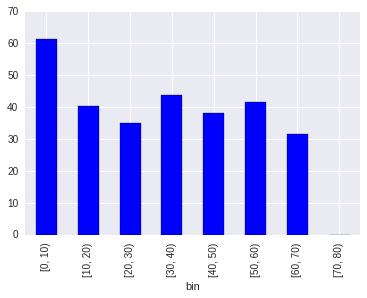

In [78]:
age_surv_count['SurvPerc'].plot(kind='bar')

The graph shows a survival rate of 60% for children below 10 years old. For the rest of the age groups, the survival rate oscillates between 30% and 45%. 
The exceptions are the oldest passengers, with ages between 70 and 80, whom none of them survived. But there were only six of them, so it is hard to know if there was an underlying cause or just randomness.

Now we will calculate the survival rate by sex and age group, to see how this two variables work together.

In [79]:
sex_age_surv_copy = sex_age_surv.copy()
sex_age_surv_copy.dropna()
sex_age_surv_copy['bin'] = pd.cut(sex_age_surv['Age'],np.arange(0,90,10), right=False)
print sex_age_surv_copy.head()

   PassengerId     Sex  Age  Survived       bin
0            2  female   38         1  [30, 40)
1            4  female   35         1  [30, 40)
2            7    male   54         0  [50, 60)
3           12  female   58         1  [50, 60)
4           24    male   28         1  [20, 30)


In [80]:
sex_age_surv_count = sex_age_surv_copy[['PassengerId', 'Sex', 'bin']].groupby(['Sex', 'bin']).count()
sex_age_surv_count['Survived'] = sex_age_surv_copy[['Survived', 'Sex', 'bin']].groupby(['Sex', 'bin']).sum()
sex_age_surv_count['SurvPerc'] = sex_age_surv_count.Survived * 100 / sex_age_surv_count.PassengerId
print sex_age_surv_count

                 PassengerId  Survived    SurvPerc
Sex    bin                                        
female [0, 10)            30        19   63.333333
       [10, 20)           45        34   75.555556
       [20, 30)           72        52   72.222222
       [30, 40)           60        50   83.333333
       [40, 50)           32        22   68.750000
       [50, 60)           18        16   88.888889
       [60, 70)            4         4  100.000000
       [70, 80)          NaN       NaN         NaN
male   [0, 10)            32        19   59.375000
       [10, 20)           57         7   12.280702
       [20, 30)          148        25   16.891892
       [30, 40)          107        23   21.495327
       [40, 50)           57        12   21.052632
       [50, 60)           30         4   13.333333
       [60, 70)           15         2   13.333333
       [70, 80)            6         0    0.000000


No females in the age group 70-80. Maybe that is one of the causes nobody survived in this bin. Now we plot female and male survival rates by age group:

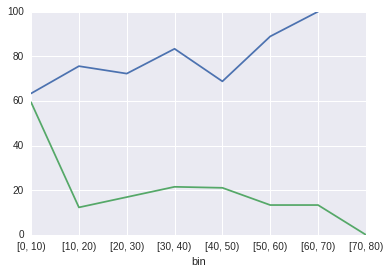

In [81]:
ax = sex_age_surv_count.loc['female']['SurvPerc'].plot(label='Females')
sex_age_surv_count.loc['male']['SurvPerc'].plot(label='Males', ax=ax)

The graph shows that for children below ten both female and male survival rates are very similar. However, for the rest of age groups, the female survival rates are high, with the minimum around 70%, and male survival rates are low, with the maximum around 20%.
The data suggests that the "women and children first" code of conduct (https://en.wikipedia.org/wiki/Women_and_children_first) was indeed followed.

Did having a cabin influence survivability?

We first add a 'Has_Cabin' boolean column to our dataset, in order to ease following data wrangling operations.

In [82]:
titanic['Has_Cabin'] = titanic.Cabin.notnull()
cabin_surv = titanic[['PassengerId', 'Has_Cabin', 'Survived']].copy()

In [83]:
cabin_surv_count = cabin_surv[['PassengerId', 'Has_Cabin']].groupby('Has_Cabin').count()
print cabin_surv_count

           PassengerId
Has_Cabin             
False              687
True               204


In [84]:
cabin_surv_count['Survived'] = cabin_surv[['Survived', 'Has_Cabin']].groupby('Has_Cabin').sum()
print cabin_surv_count

           PassengerId  Survived
Has_Cabin                       
False              687       206
True               204       136


At first sight, it looks like having paid for a cabin affected the probability of survival. The problem is, most cabins where occupied by fist class passengers:

In [85]:
print titanic[['PassengerId', 'Has_Cabin', 'Pclass']].groupby(['Has_Cabin', 'Pclass']).count()

                  PassengerId
Has_Cabin Pclass             
False     1                40
          2               168
          3               479
True      1               176
          2                16
          3                12


and it looks like the passenger class also influenced survivability:

In [86]:
class_surv = titanic[['PassengerId', 'Pclass']].copy()
class_surv_count = class_surv.groupby('Pclass').count()
class_surv_count['Survived'] = titanic[['Survived', 'Pclass']].groupby('Pclass').sum()
print class_surv_count

        PassengerId  Survived
Pclass                       
1               216       136
2               184        87
3               491       119


So, a fairer comparison could be between the forty first class passengers that did not pay for a cabin and the rest of the same class:

In [87]:
cabin_surv = titanic[['PassengerId', 'Has_Cabin', 'Survived']][titanic['Pclass'] == 1].copy()
cabin_surv_count = cabin_surv[['PassengerId', 'Has_Cabin']].groupby('Has_Cabin').count()
cabin_surv_count['Survived'] = cabin_surv[['Survived', 'Has_Cabin']].groupby('Has_Cabin').sum()
cabin_surv_count['SurvPerc'] = cabin_surv_count['Survived'] * 100 / cabin_surv_count['PassengerId']
print cabin_surv_count

           PassengerId  Survived   SurvPerc
Has_Cabin                                  
False               40        19  47.500000
True               176       117  66.477273


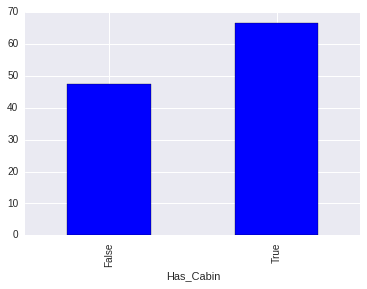

In [88]:
cabin_surv_count.SurvPerc.plot(kind='bar')

The data shows that the survival rate of first class passengers with a cabin is about twenty percentage points higher than those of the same class that did not have a cabin.